# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [1]:
import pandas as pd
churn = pd.read_csv('./churn_clean.csv')

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   average_charge_normal                  7043 non-null   float64
 1   tenure_bins                            7043 non-null   int64  
 2   PhoneService_Yes                       7043 non-null   int64  
 3   Contract_One year                      7043 non-null   int64  
 4   Contract_Two year                      7043 non-null   int64  
 5   PaymentMethod_Credit card (automatic)  7043 non-null   int64  
 6   PaymentMethod_Electronic check         7043 non-null   int64  
 7   PaymentMethod_Mailed check             7043 non-null   int64  
 8   MonthlyCharges_normal                  7043 non-null   float64
 9   TotalCharges_log                       7043 non-null   float64
 10  Churn_Yes                              7043 non-null   int64  
dtypes: f

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

X = churn.drop(['Churn_Yes'], axis=1)
y = churn['Churn_Yes']

splitter = StratifiedShuffleSplit(n_splits=2)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [4]:
'''
use sklearn to fit a decision tree to the training data

    plot the decision tree
    change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
'''

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc1 = DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=2)
dtc2 = DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=3)
dtc3 = DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=4)
dtc4 = DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=None)

dt_classifiers = [dtc1, dtc2, dtc3, dtc4]

In [5]:
for clf in dt_classifiers:
    clf.fit(X_train, y_train)

In [6]:
train_scores = []
test_scores = []

for clf in dt_classifiers:
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

In [7]:
for i in range(0, len(dt_classifiers)):
    print(f'max_depth: {dt_classifiers[i].get_params()["max_depth"]}, actual depth: {dt_classifiers[i].get_depth()}')
    print(f'train score: {train_scores[i]} test score: {test_scores[i]}')
    print('')
    #7872340425531915

max_depth: 2, actual depth: 2
train score: 0.7798990217734301 test score: 0.7943262411347518

max_depth: 3, actual depth: 3
train score: 0.7798990217734301 test score: 0.7943262411347518

max_depth: 4, actual depth: 4
train score: 0.7858946039760176 test score: 0.8056737588652483

max_depth: None, actual depth: 23
train score: 0.8957084253707794 test score: 0.7531914893617021



In [8]:
best_dtc = dtc3

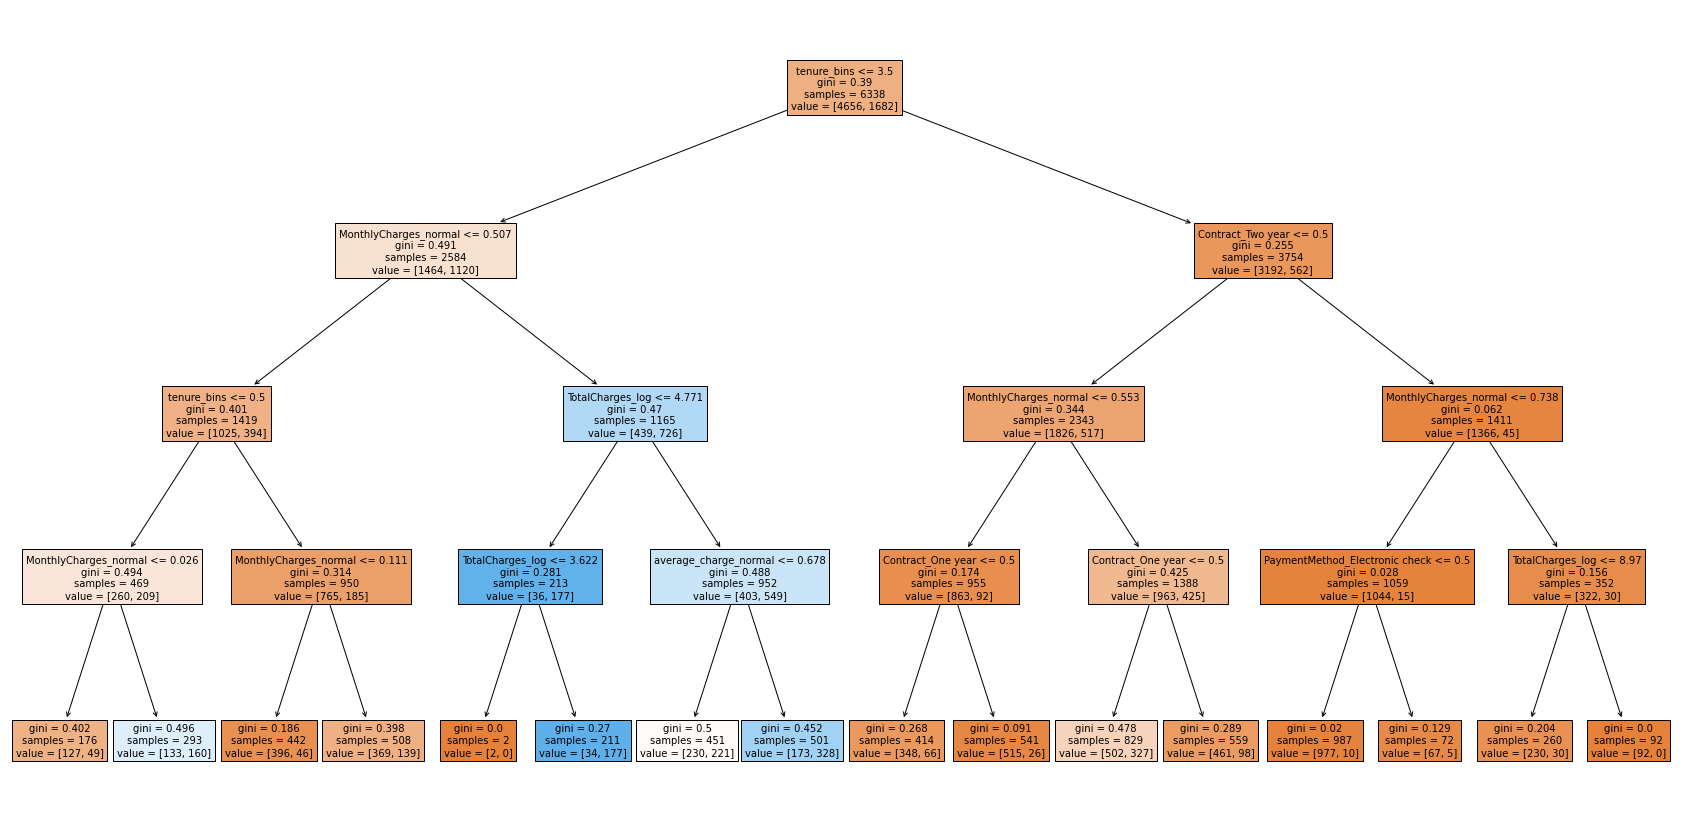

In [9]:
from matplotlib import pyplot as plt

f = plt.figure(figsize=(30,15))
_ = plot_tree(best_dtc, fontsize=10, feature_names=X_train.columns, filled=True)

In [10]:
import seaborn as sns

<AxesSubplot:>

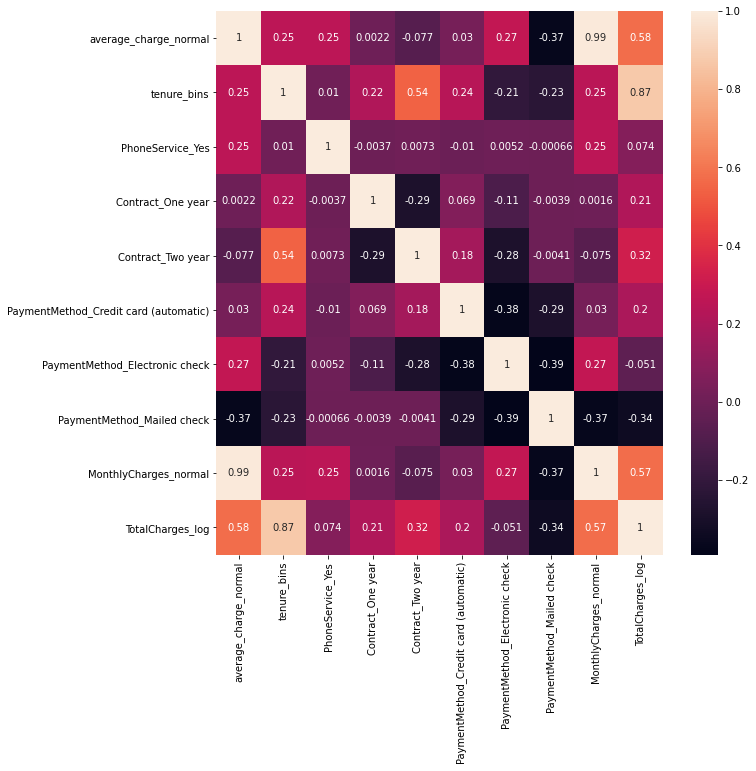

In [11]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True)

<AxesSubplot:title={'center':'Feature Importance'}>

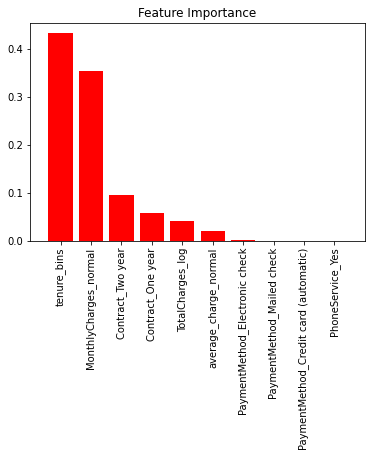

In [12]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(best_dtc, feature_names=X_train.columns, x_tick_rotation=90)

In [13]:
# Let's drop the unimportant columns and try again with the best performing hyperparameters
X_train_trunc = X_train.drop(['PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)', 'PhoneService_Yes'], axis=1)
X_test_trunc = X_test.drop(['PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)', 'PhoneService_Yes'], axis=1)

In [16]:
best_dtc.fit(X_train_trunc, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=15, random_state=42)

In [18]:
print(f'train score: {best_dtc.score(X_train_trunc, y_train)}, test score: {best_dtc.score(X_test_trunc, y_test)}')
# Same exact score oh well

train score: 0.7858946039760176, test score: 0.8056737588652483


<AxesSubplot:title={'center':'Feature Importance'}>

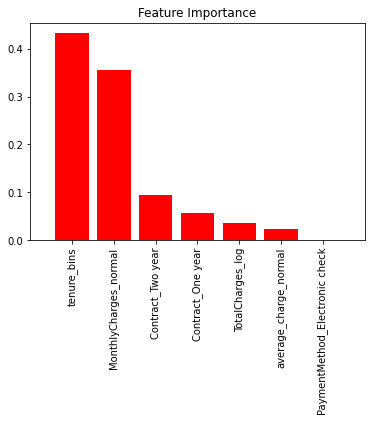

In [19]:
plot_feature_importances(best_dtc, feature_names=X_train_trunc.columns, x_tick_rotation=90)

In [20]:
# Okay now let's create a random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, max_depth=4)
rfc.fit(X_train, y_train)
print(f'train score: {rfc.score(X_train, y_train)}, test score: {rfc.score(X_test, y_test)}')
# Slightly better!

train score: 0.7956768696749763, test score: 0.8042553191489362


<AxesSubplot:title={'center':'Feature Importance'}>

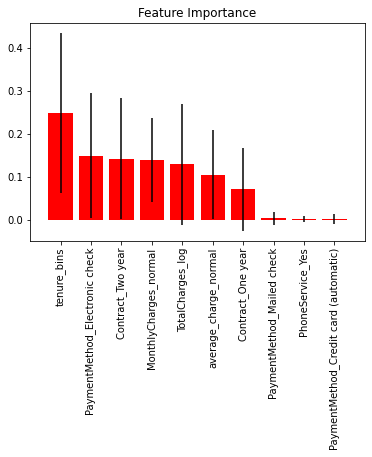

In [23]:
plot_feature_importances(rfc, feature_names=X_train.columns, x_tick_rotation=90)
# Same importance as before

In [25]:
rfc.fit(X_train_trunc, y_train)
print(f'train score: {rfc.score(X_train_trunc, y_train)}, test score: {rfc.score(X_test_trunc, y_test)}')
# Ah just a tiny bit better... 0.3%

train score: 0.7964657620700536, test score: 0.8070921985815603


# Summary

Tuning the max depth of the Decision tree allowed me to maximize the accuracy of a single tree. Then, using the ideal DecisionTree's parameters, a RandomForest with the same
parameters was able to take the accuracy even further. Analyzing the single tree gives you insight into the features and how they're being used in a very visible way. It makes it
a little bit easier to understand what is happening if you use the same parameters when you create the Random Forest classifier. Removing some of the less important features 
also made a positive improvement for both the single tree and the forest. Unsurprisingly, the same features were unimportant for both. I'm happy that I reached a higher score 
this week with the same dataset and model as last week, just by understanding better how I'm tuning the Random Forest.